In [2]:
"""
This script produces the Figures 9 from Amaral+2021, the
water escape by flares for stars between 0.2 and 0.6 Msun,
initial surface water between 1 and 10 TO, and planetary mass
between 0.5 and 5 Mearth, using VPLANET's AtmEsc,
STELLAR and FLARE modules.

Laura N. R. do Amaral, Universidad Nacional Autónoma de México, 2021
Date:  July 18th 2021
"""

import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors


# Check correct number of arguments
'''if (len(sys.argv) != 2):
    print('ERROR: Incorrect number of arguments.')
    print('Usage: '+sys.argv[0]+' <pdf | png>')
    exit(1)
if (sys.argv[1] != 'pdf' and sys.argv[1] != 'png'):
    print('ERROR: Unknown file format: '+sys.argv[1])
    print('Options are: pdf, png')
    exit(1)
'''

#NÚMERO DE ESTRELAS SIMULADAS
range_1 = 17
#NÚMERO DE OCEANOS SIMULADOS
range_2 = 37
#NÚMERO DE PLANETAS SIMULADOS
range_3 = 10


dirs_keys = []

for i in range(0,range_2):
    for k in range(0,range_3):
        for j in range(0,range_1):
              dirs_keys.append(f'{j}_{k}_{i}')            
              
#home = input("What is the directory that the folder water_escape_flares is placed?")
#print(home)              
              
########################################################
############LOADING DATA #################################              
########################################################              

path = './'#home+'/water_escape_flares/Data/'

folder = path+'flareRG.txt'
WL_flare,WI_flare = np.genfromtxt(folder, usecols = (6,7), unpack=True)
outputs_WI_flare = dict(zip(dirs_keys,WI_flare))
outputs_WL_flare = dict(zip(dirs_keys,WL_flare))

folder = path+'flareStopRG.txt'
WL_flare,WI_flare = np.genfromtxt(folder,usecols = (6,7), unpack=True)
outputs_WI_flare_stop = dict(zip(dirs_keys,WI_flare))
outputs_WL_flare_stop = dict(zip(dirs_keys,WL_flare))

folder = path+'stellarStopRG.txt'
WL_stellar,WI_stellar = np.genfromtxt(folder,usecols = (6,7), unpack=True)
outputs_WI_stellar_stop = dict(zip(dirs_keys,WI_stellar))
outputs_WL_stellar_stop = dict(zip(dirs_keys,WL_stellar))

folder = path+'stellarRG.txt'
WL_stellar,WI_stellar = np.genfromtxt(folder,usecols = (6,7), unpack=True)
outputs_WI_stellar = dict(zip(dirs_keys,WI_stellar))
outputs_WL_stellar = dict(zip(dirs_keys,WL_stellar))



In [3]:
################################################
keys = dict(zip(dirs_keys,WI_stellar)) 

water_esc_flare = {}
for ik in keys.keys():
        water_esc_flare[ik] = outputs_WI_flare[ik]-outputs_WL_flare[ik]

water_escP_flare = {}
for ik in keys.keys():
        water_escP_flare[ik] = (water_esc_flare[ik]*100)/outputs_WI_flare[ik]

water_esc_stellar = {}
for ik in keys.keys():
        water_esc_stellar[ik] = outputs_WI_stellar[ik]-outputs_WL_stellar[ik]

water_escP_stellar = {}
for ik in keys.keys():
        water_escP_stellar[ik] = (water_esc_stellar[ik]*100)/outputs_WI_stellar[ik]

water_esc_abs = {}
for ik in keys.keys():
        water_esc_abs[ik] = water_esc_flare[ik]-water_esc_stellar[ik]

water_escP = {}
for ik in keys.keys():
        water_escP[ik] = water_escP_flare[ik] - water_escP_stellar[ik]

##################################################

water_esc_flare_stop = {}
for ik in keys.keys():
        water_esc_flare_stop[ik] = outputs_WI_flare_stop[ik]-outputs_WL_flare_stop[ik]

water_escP_flare_stop = {}
for ik in keys.keys():
        water_escP_flare_stop[ik] = (water_esc_flare_stop[ik]*100)/outputs_WI_flare_stop[ik]
    
water_esc_stellar_stop = {}
for ik in keys.keys():
        water_esc_stellar_stop[ik] = outputs_WI_stellar_stop[ik]-outputs_WL_stellar_stop[ik]

water_escP_stellar_stop = {}
for ik in keys.keys():
        water_escP_stellar_stop[ik] = (water_esc_stellar_stop[ik]*100)/outputs_WI_stellar_stop[ik]

water_esc_abs_stop = {}
for ik in keys.keys():
        water_esc_abs_stop[ik] = water_esc_flare_stop[ik]-water_esc_stellar_stop[ik]

water_escP_stop= {}
for ik in keys.keys():
        water_escP_stop[ik] = water_escP_flare_stop[ik] - water_escP_stellar_stop[ik]


######################################################
Masses = [0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6]
water_init = []
planetary = []
stellar_mass = []

for i in range(0,37):
    i = 1+i*0.25
    water_init.append(i)

for i in range(20,61):
    i = 0+i*0.01
    stellar_mass.append(i)

for i in range(10,101):
    i = 0+i*0.05
    planetary.append(i)

In [6]:
########################################################
####################  P L O T ##############################
########################################################

M = 17
wf = []
Af = []
Zf = []

ws = []
As = []
Zs = []
for ik, val in water_esc_abs.items():
    wf.append(val)

for ik, val in water_esc_flare.items():
    ws.append(val)  
    
for i in range(0,10):
        Af.append(wf[(i*M):(i+1)*M]+ wf[(i+10)*M:(i+11)*M]+wf[(i+20)*M:(i+21)*M]+wf[(i+30)*M:(i+31)*M]+wf[(i+40)*M:(i+41)*M]+wf[(i+50)*M:(i+51)*M]+wf[(i+60)*M:(i+61)*M]+wf[(i+70)*M:(i+71)*M]+wf[(i+80)*M:(i+81)*M]+wf[(i+90)*M:(i+91)*M]+wf[(i+100)*M:(i+101)*M]+wf[(i+110)*M:(i+111)*M]+wf[(i+120)*M:(i+121)*M]+wf[(i+130)*M:(i+131)*M]+wf[(i+140)*M:(i+141)*M]+wf[(i+150)*M:(i+151)*M]+wf[(i+160)*M:(i+161)*M]+wf[(i+170)*M:(i+171)*M]+wf[(i+180)*M:(i+181)*M]+wf[(i+190)*M:(i+191)*M]+wf[(i+200)*M:(i+201)*M]+wf[(i+210)*M:(i+211)*M]+wf[(i+220)*M:(i+221)*M]+wf[(i+230)*M:(i+231)*M]+wf[(i+240)*M:(i+241)*M]+wf[(i+250)*M:(i+251)*M]+wf[(i+260)*M:(i+261)*M]+wf[(i+270)*M:(i+271)*M]+wf[(i+280)*M:(i+281)*M]+wf[(i+290)*M:(i+291)*M]+wf[(i+300)*M:(i+301)*M]+wf[(i+310)*M:(i+311)*M]+wf[(i+320)*M:(i+321)*M]+wf[(i+330)*M:(i+331)*M]+wf[(i+340)*M:(i+341)*M]+wf[(i+350)*M:(i+351)*M]+wf[(i+360)*M:(i+361)*M])
        As.append(ws[(i*M):(i+1)*M]+ ws[(i+10)*M:(i+11)*M]+ws[(i+20)*M:(i+21)*M]+ws[(i+30)*M:(i+31)*M]+ws[(i+40)*M:(i+41)*M]+ws[(i+50)*M:(i+51)*M]+ws[(i+60)*M:(i+61)*M]+ws[(i+70)*M:(i+71)*M]+ws[(i+80)*M:(i+81)*M]+ws[(i+90)*M:(i+91)*M]+ws[(i+100)*M:(i+101)*M]+ws[(i+110)*M:(i+111)*M]+ws[(i+120)*M:(i+121)*M]+ws[(i+130)*M:(i+131)*M]+ws[(i+140)*M:(i+141)*M]+ws[(i+150)*M:(i+151)*M]+ws[(i+160)*M:(i+161)*M]+ws[(i+170)*M:(i+171)*M]+ws[(i+180)*M:(i+181)*M]+ws[(i+190)*M:(i+191)*M]+ws[(i+200)*M:(i+201)*M]+ws[(i+210)*M:(i+211)*M]+ws[(i+220)*M:(i+221)*M]+ws[(i+230)*M:(i+231)*M]+ws[(i+240)*M:(i+241)*M]+ws[(i+250)*M:(i+251)*M]+ws[(i+260)*M:(i+261)*M]+ws[(i+270)*M:(i+271)*M]+ws[(i+280)*M:(i+281)*M]+ws[(i+290)*M:(i+291)*M]+ws[(i+300)*M:(i+301)*M]+ws[(i+310)*M:(i+311)*M]+ws[(i+320)*M:(i+321)*M]+ws[(i+330)*M:(i+331)*M]+ws[(i+340)*M:(i+341)*M]+ws[(i+350)*M:(i+351)*M]+ws[(i+360)*M:(i+361)*M])

for i in range(0,10):
        Zf.append((np.reshape(Af[i], (range_2, range_1))).T)
        Zs.append((np.reshape(As[i], (range_2, range_1))).T)        
'''
wf = []
Af1 = []
Zf1 = []

ws = []
As1 = []
Zs1 = []

for ik, val in water_esc_abs.items():
    wf.append(val)

for ik, val in water_esc_abs_stop.items():
    ws.append(val)

for i in range(0,10):
        Af1.append(wf[(i*M):(i+1)*M]+ wf[(i+10)*M:(i+11)*M]+wf[(i+20)*M:(i+21)*M]+wf[(i+30)*M:(i+31)*M]+wf[(i+40)*M:(i+41)*M]+wf[(i+50)*M:(i+51)*M]+wf[(i+60)*M:(i+61)*M]+wf[(i+70)*M:(i+71)*M]+wf[(i+80)*M:(i+81)*M]+wf[(i+90)*M:(i+91)*M]+wf[(i+100)*M:(i+101)*M]+wf[(i+110)*M:(i+111)*M]+wf[(i+120)*M:(i+121)*M]+wf[(i+130)*M:(i+131)*M]+wf[(i+140)*M:(i+141)*M]+wf[(i+150)*M:(i+151)*M]+wf[(i+160)*M:(i+161)*M]+wf[(i+170)*M:(i+171)*M]+wf[(i+180)*M:(i+181)*M]+wf[(i+190)*M:(i+191)*M]+wf[(i+200)*M:(i+201)*M]+wf[(i+210)*M:(i+211)*M]+wf[(i+220)*M:(i+221)*M]+wf[(i+230)*M:(i+231)*M]+wf[(i+240)*M:(i+241)*M]+wf[(i+250)*M:(i+251)*M]+wf[(i+260)*M:(i+261)*M]+wf[(i+270)*M:(i+271)*M]+wf[(i+280)*M:(i+281)*M]+wf[(i+290)*M:(i+291)*M]+wf[(i+300)*M:(i+301)*M]+wf[(i+310)*M:(i+311)*M]+wf[(i+320)*M:(i+321)*M]+wf[(i+330)*M:(i+331)*M]+wf[(i+340)*M:(i+341)*M]+wf[(i+350)*M:(i+351)*M]+wf[(i+360)*M:(i+361)*M]) 
        As1.append(ws[(i*M):(i+1)*M]+ ws[(i+10)*M:(i+11)*M]+ws[(i+20)*M:(i+21)*M]+ws[(i+30)*M:(i+31)*M]+ws[(i+40)*M:(i+41)*M]+ws[(i+50)*M:(i+51)*M]+ws[(i+60)*M:(i+61)*M]+ws[(i+70)*M:(i+71)*M]+ws[(i+80)*M:(i+81)*M]+ws[(i+90)*M:(i+91)*M]+ws[(i+100)*M:(i+101)*M]+ws[(i+110)*M:(i+111)*M]+ws[(i+120)*M:(i+121)*M]+ws[(i+130)*M:(i+131)*M]+ws[(i+140)*M:(i+141)*M]+ws[(i+150)*M:(i+151)*M]+ws[(i+160)*M:(i+161)*M]+ws[(i+170)*M:(i+171)*M]+ws[(i+180)*M:(i+181)*M]+ws[(i+190)*M:(i+191)*M]+ws[(i+200)*M:(i+201)*M]+ws[(i+210)*M:(i+211)*M]+ws[(i+220)*M:(i+221)*M]+ws[(i+230)*M:(i+231)*M]+ws[(i+240)*M:(i+241)*M]+ws[(i+250)*M:(i+251)*M]+ws[(i+260)*M:(i+261)*M]+ws[(i+270)*M:(i+271)*M]+ws[(i+280)*M:(i+281)*M]+ws[(i+290)*M:(i+291)*M]+ws[(i+300)*M:(i+301)*M]+ws[(i+310)*M:(i+311)*M]+ws[(i+320)*M:(i+321)*M]+ws[(i+330)*M:(i+331)*M]+ws[(i+340)*M:(i+341)*M]+ws[(i+350)*M:(i+351)*M]+ws[(i+360)*M:(i+361)*M])

for i in range(0,10):
        Zf1.append((np.reshape(Af1[i], (range_2, range_1))).T)
        Zs1.append((np.reshape(As1[i], (range_2, range_1))).T)        
'''
X, Y = np.meshgrid(water_init,Masses)

mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2;
mpl.rcParams['ytick.major.size'] = 4;
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in';mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True;mpl.rcParams['xtick.bottom'] = True; mpl.rcParams['ytick.right'] = True
'''maximum = [max(As[0]),max(As[1]),max(As[3]),max(As[5]),max(As[9]),max(Af[0]),max(Af[1]),max(Af[3]),max(Af[5]),max(Af[9])]

round_to_tenths = ['max '+str(round(num, 2))+'%' for num in maximum]
print(round_to_tenths)'''



"maximum = [max(As[0]),max(As[1]),max(As[3]),max(As[5]),max(As[9]),max(Af[0]),max(Af[1]),max(Af[3]),max(Af[5]),max(Af[9])]\n\nround_to_tenths = ['max '+str(round(num, 2))+'%' for num in maximum]\nprint(round_to_tenths)"

<ipython-input-34-00af160b9753>:80: UserWarning: The following kwargs were not used by contour: 'contours_showlines'
  imf = axes[0].contourf(dtf[5][0], dtf[5][1], dtf[5][2],levels=levels,vmax=vmax,vmin=vmin, cmap = 'cubehelix_r',contours_showlines=False)
<ipython-input-34-00af160b9753>:81: UserWarning: The following kwargs were not used by contour: 'contours_showlines'
  ims = axes[1].contourf(dts[5][0], dts[5][1], dts[5][2],levels=levels,vmax=vmax,vmin=vmin,  cmap = 'cubehelix_r',contours_showlines=False)
<ipython-input-34-00af160b9753>:98: UserWarning: The following kwargs were not used by contour: 'contours_showlines'
  im0 = axes[0].contourf(dtf[5][0], dtf[5][1], dtf[5][2], levels=levels,vmax=vmax,vmin=vmin, cmap = 'cubehelix_r',contours_showlines=False)
<ipython-input-34-00af160b9753>:99: UserWarning: The following kwargs were not used by contour: 'contours_showlines'
  im1 = axes[1].contourf(dts[5][0], dts[5][1], dts[5][2], levels=levels,vmax=vmax,vmin=vmin, cmap = 'cubehelix_r'

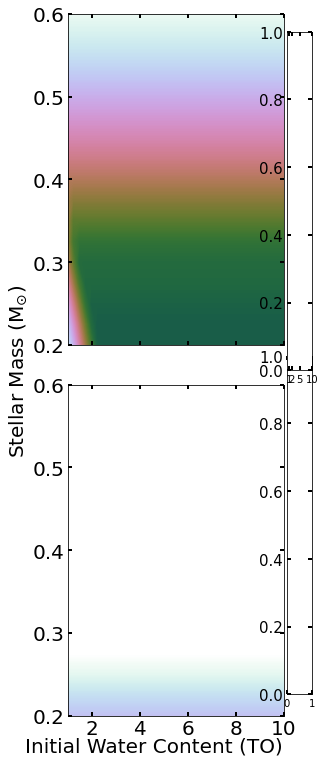

In [34]:


fig, axes = plt.subplots(figsize=(4,10), nrows=2, ncols=1, sharey=True ,sharex=True)


fig.text(0.5, -0.03, 'Initial Water Content (TO)', ha='center',  fontsize = 20)
fig.text(-0.01, 0.5, 'Stellar Mass (M$_{\odot}$)', va='center', rotation='vertical', fontsize = 20)
#fig.text(0.5,0.51, 'Runaway Greenhouse phase during PMS', ha='center',  fontsize = 40)
#fig.text(0.5,1.01, 'Runaway Greenhouse phase 1 Gyr', ha='center',  fontsize = 40)


v = np.linspace(0, 2,11)

vv = [1,10]
levels = np.array(vv)

vv = [0,1,5,10]
levels1 = np.array(vv)

vv = [0,5,10,20,30,50,70,90]
levels2 = np.array(vv)

vv = [0,10,20,30,40,50,60]
levels3 = np.array(vv)

vv = [0,10,30,50,90]
levels4 = np.array(vv)

vv = [0,1,5,10,20,50,90]
levels5 = np.array(vv)

'''
CSf = []

CSf.append(axes[0,0].contour(X, Y,Zf[0], levels,colors= 'k'))
CSf.append(axes[0,1].contour(X, Y,Zf[1], levels3, colors= 'k'))
CSf.append(axes[0,2].contour(X, Y,Zf[3], levels2, colors=('k', 'k', 'k', 'k','k','k','k','k','k')))
CSf.append(axes[0,3].contour(X, Y,Zf[5], levels5, colors=('k', 'k', 'k', 'k','k','k')))
CSf.append(axes[0,4].contour(X, Y,Zf[9], levels5, colors=('k', 'k', 'k', 'k','k','k')))

CSf.append(axes[1,0].contour(X, Y,Zs[0], levels1, colors=('k', 'k', 'k', 'k','k','k')))
CSf.append(axes[1,1].contour(X, Y,Zs[1], levels1, colors=('k', 'k', 'k', 'k','k','k')))
CSf.append(axes[1,2].contour(X, Y,Zs[3], levels2, colors=('k', 'k', 'k', 'k','k','k')))
CSf.append(axes[1,3].contour(X, Y,Zs[5], levels5, colors=('k', 'k', 'k', 'k','k','k')))
CSf.append(axes[1,4].contour(X, Y,Zs[9], levels4, colors=('k', 'k', 'k', 'k','k','k')))

'''
dtf = {}
        
for ik, val in enumerate(Zf1):
    dtf[ik] = [X,Y,val]
    
dts = {}
        
for ik, val in enumerate(Zs1):
    dts[ik] = [X,Y,val]
    
planet = [r'0.5 M$_{\oplus}$', r'1 M$_{\oplus}$',r'2 M$_{\oplus}$', r'3 M$_{\oplus}$', r'5 M$_{\oplus}$']

'''
manual_1 = [(3.1, 0.31), (8.7,0.28),(5,0.4),(1.1,0.37),(2,0.5),(2,0.56),(3,0.45)]
manual_2 = [(2.0,0.4), (3,0.35),(5,0.3),(7, 0.41), (1.2,0.45),(9,0.55)]

plt.clabel(CSf[0],CSf[0].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[1],CSf[1].levels[0::],manual = manual_1,inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[2],CSf[2].levels[0::],manual = manual_2,inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[3],CSf[3].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[4],CSf[4].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[5],CSf[5].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[6],CSf[6].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[7],CSf[7].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[8],CSf[8].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
plt.clabel(CSf[9],CSf[9].levels[0::],inline=True, fontsize=25,fmt= '%1.0f'+str('%%'),inline_spacing= 5.5)
'''

index = [5]

vmax=2
vmin=0
levels = np.linspace(vmin,vmax,1000)

imf = axes[0].contourf(dtf[5][0], dtf[5][1], dtf[5][2],levels=levels,vmax=vmax,vmin=vmin, cmap = 'cubehelix_r',contours_showlines=False)
ims = axes[1].contourf(dts[5][0], dts[5][1], dts[5][2],levels=levels,vmax=vmax,vmin=vmin,  cmap = 'cubehelix_r',contours_showlines=False)
#    for c in imf.collections:
#          c.set_edgecolor("face")
#    for c in ims.collections:
#          c.set_edgecolor("face")


    
for i in range(3,3):
    # planetary mass
    axes[0].annotate(planet[i], xy=(6.9, 0.205),  fontsize = 30, color = 'black', fontweight='bold',bbox=dict(boxstyle='round,pad=0.1', fc='white', edgecolor = 'white', alpha=0.9))
    axes[1].annotate(planet[i], xy=(6.9, 0.205),  fontsize = 30, color = 'black', fontweight='bold',bbox=dict(boxstyle='round,pad=0.1', fc='white', edgecolor = 'white', alpha=0.9))
    # maximum values
 #   axes[0,i].annotate(round_to_tenths[i], xy=(2.9, 0.57),  fontsize = 30, color = 'black', fontweight='bold',bbox=dict(boxstyle='round,pad=0.1', fc='white', edgecolor = 'white', alpha=0.9))
 #   axes[1,i].annotate(round_to_tenths[i+5], xy=(2.9, 0.57),  fontsize = 30, color = 'black', fontweight='bold',bbox=dict(boxstyle='round,pad=0.1', fc='white', edgecolor = 'white', alpha=0.9))

    
im0 = axes[0].contourf(dtf[5][0], dtf[5][1], dtf[5][2], levels=levels,vmax=vmax,vmin=vmin, cmap = 'cubehelix_r',contours_showlines=False)
im1 = axes[1].contourf(dts[5][0], dts[5][1], dts[5][2], levels=levels,vmax=vmax,vmin=vmin, cmap = 'cubehelix_r',contours_showlines=False)


'''
#2.93292387714033,1.34  
axes[0,3].scatter(1.2,0.480,marker= 'o', edgecolor = 'k',color = 'red', s = 505, label= 'Kepler 1229b') 
axes[0,3].scatter(9.8,0.480,marker= 'o', edgecolor = 'k',color = 'red', s = 505, label= 'Kepler 1229b') 
axes[1,3].scatter(1.2,0.480,marker= 'o', edgecolor = 'k',color = 'red', s = 505, label= 'Kepler 1229b') 
axes[1,3].scatter(9.8,0.480,marker= 'o', edgecolor = 'k',color = 'red', s = 505, label= 'Kepler 1229b') 
  
#2.550251841969678,1.29
axes[0,2].scatter(1.2,0.271365,marker= 's', edgecolor = 'k',color = 'green', s = 505, label= 'K2 72e')
axes[0,2].scatter(9.8,0.271365,marker= 's', edgecolor = 'k',color = 'green', s = 505, label= 'K2 72e')
axes[1,2].scatter(1.2,0.271365,marker= 's', edgecolor = 'k',color = 'green', s = 505, label= 'K2 72e')
axes[1,2].scatter(9.8,0.271365,marker= 's', edgecolor = 'k',color = 'green', s = 505, label= 'K2 72e')

#1.6398468083961741,1.144
axes[0,2].scatter(1.2, 0.415 ,marker= '*', edgecolor = 'white',color = 'blue', s = 1005, label= 'TOI 700d')
axes[0,2].scatter(9.8, 0.415 ,marker= '*', edgecolor = 'white',color = 'blue', s = 1005, label= 'TOI 700d')
axes[1,2].scatter(1.2, 0.415 ,marker= '*', edgecolor = 'white',color = 'blue', s = 1005, label= 'TOI 700d')
axes[1,2].scatter(9.8, 0.415 ,marker= '*', edgecolor = 'white',color = 'blue', s = 1005, label= 'TOI 700d')

#1.2389021700321832  ,1.06]
axes[0,1].scatter(1.2,0.21,marker= '^', edgecolor = 'k',color = 'gold',s = 605, label= 'Kepler 1649c')
axes[0,1].scatter(9.8,0.21,marker= '^', edgecolor = 'k',color = 'gold',s = 605, label= 'Kepler 1649c')
axes[1,1].scatter(1.2,0.21,marker= '^', edgecolor = 'k',color = 'gold',s = 605, label= 'Kepler 1649c')
axes[1,1].scatter(9.8,0.21,marker= '^', edgecolor = 'k',color = 'gold',s = 605, label= 'Kepler 1649c')


'''

for ax in axes.flatten():
    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        
cbar_ax0 = fig.add_axes([0.96, 0.05, 0.09, 0.47])
fig.colorbar(im0, cax=cbar_ax, orientation = 'vertical',ticks = v,ax=axes)
cbar_ax.set_ylabel('Surface water escaped by flares (TO)', fontsize = 15,labelpad = 10.8)

cbar_ax1 = fig.add_axes([0.96, 0.5, 0.09, 0.47])
fig.colorbar(im1, cax=cbar_ax, orientation = 'vertical',ticks = v,ax=axes)
cbar_ax.set_ylabel('Surface water escaped by flares (TO)', fontsize = 15,labelpad = 10.8)



for t in cbar_ax0.axes.get_yticklabels():
     t.set_fontsize(15)
        
for t in cbar_ax1.axes.get_yticklabels():
     t.set_fontsize(15)
        
        
fig.subplots_adjust(left = 0.2,bottom=0.02, right=0.95, top=0.995, wspace = 0.04, hspace =0.12 )
a = [1,2,5,10]
plt.xticks(ticks=a)
ax.yaxis.set_major_locator(MaxNLocator(4)) 
ax.xaxis.set_major_locator(MaxNLocator(5)) 

# Save figure
#if (sys.argv[1] == 'pdf'):
#    fig.savefig('WaterEscapeTot.pdf', bbox_inches="tight", dpi=400)
#if (sys.argv[1] == 'png'):
fig.savefig('WaterEscapeTot.png', bbox_inches="tight", dpi=400)     